# Data dimensionality reduction using an autoencoder using the TensorFlow Python

In [1]:
import random

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras.layers import Dense, Input
import tensorflow as tf

2022-06-28 21:58:39.181731: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-06-28 21:58:39.181775: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


Generation of points in three-dimensional space and dividing them into training and test sets

In [2]:
def plot_2d_points(X):
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot()
    for x in X: ax.scatter(x[0], x[1], color="tab:orange")
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    plt.show()

def plot_1d_points(X):
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot()
    ax.plot(X, len(X) * [1], "o", color="tab:orange")
    plt.show()
    
X = []
for i in range(500): X.append(np.array([random.uniform(1, 5), random.uniform(1, 5), random.uniform(1, 5)]))
X = np.array(X)
X_train, X_test = X[:400], X[400:]

Building a model of a linear autoencoder for two-dimensional representation

In [3]:
input_val = Input(shape=(None, 500, 3))
encoded = Dense(2, activation='linear')(input_val)
decoded = Dense(3, activation='linear')(encoded)

autoencoder_2d = keras.Model(input_val, decoded)
encoder = keras.Model(input_val, encoded)
autoencoder_2d.compile(optimizer='adam', loss='mean_squared_error')
autoencoder_2d.fit(X_train, X_train, epochs=100, shuffle=True, verbose=1)

2022-06-28 21:58:44.782155: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-06-28 21:58:44.782272: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-06-28 21:58:44.782320: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (nightcity2): /proc/driver/nvidia/version does not exist
2022-06-28 21:58:44.782976: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/100
13/13 [==============================] - 1s 4ms/step - loss: 8.3281
Epoch 2/100
13/13 [==============================] - 0s 6ms/step - loss: 7.8079
Epoch 3/100
13/13 [==============================] - 0s 5ms/step - loss: 7.3498
Epoch 4/100
13/13 [==============================] - 0s 4ms/step - loss: 6.9461
Epoch 5/100
13/13 [==============================] - 0s 4ms/step - loss: 6.5642
Epoch 6/100
13/13 [==============================] - 0s 5ms/step - loss: 6.2155
Epoch 7/100
13/13 [==============================] - 0s 4ms/step - loss: 5.8734
Epoch 8/100
13/13 [==============================] - 0s 4ms/step - loss: 5.5413
Epoch 9/100
13/13 [==============================] - 0s 4ms/step - loss: 5.2226
Epoch 10/100
13/13 [==============================] - 0s 4ms/step - loss: 4.9091
Epoch 11/100
13/13 [==============================] - 0s 4ms/step - loss: 4.6003
Epoch 12/100
13/13 [==============================] - 0s 5ms/step - loss: 4.2993
Epoch 13/100
13/13 [=================

Displaying a two-dimensional representation graphically

4/4 [==============================] - 0s 3ms/step


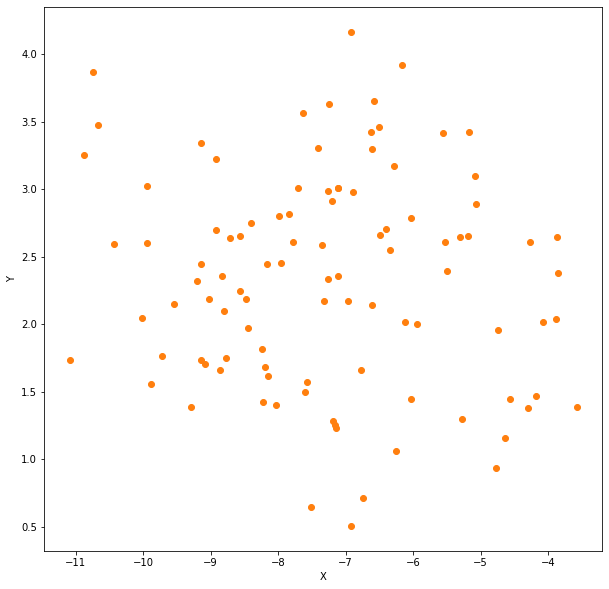

4/4 [==============================] - 0s 7ms/step - loss: 0.5088
MSE : 0.5087502598762512


In [4]:
encoded = encoder.predict(X_test)
plot_2d_points(encoded)
print(f"MSE : {autoencoder_2d.evaluate(X_test, X_test)}")

Building a model of a linear autoencoder for one-dimensional representation

In [5]:
input_val = Input(shape=(None, 500, 3))
encoded = Dense(1, activation='linear')(input_val)
decoded = Dense(3, activation='linear')(encoded)

autoencoder_1d = keras.Model(input_val, decoded)
encoder = keras.Model(input_val, encoded)
autoencoder_1d.compile(optimizer='adam', loss='mean_squared_error')
autoencoder_1d.fit(X, X, epochs=100, shuffle=True, verbose=1)

Epoch 1/100
16/16 [==============================] - 1s 3ms/step - loss: 10.8731
Epoch 2/100
16/16 [==============================] - 0s 4ms/step - loss: 10.6541
Epoch 3/100
16/16 [==============================] - 0s 4ms/step - loss: 10.4516
Epoch 4/100
16/16 [==============================] - 0s 5ms/step - loss: 10.2650
Epoch 5/100
16/16 [==============================] - 0s 4ms/step - loss: 10.0798
Epoch 6/100
16/16 [==============================] - 0s 4ms/step - loss: 9.8980
Epoch 7/100
16/16 [==============================] - 0s 3ms/step - loss: 9.7142
Epoch 8/100
16/16 [==============================] - 0s 4ms/step - loss: 9.5283
Epoch 9/100
16/16 [==============================] - 0s 5ms/step - loss: 9.3431
Epoch 10/100
16/16 [==============================] - 0s 5ms/step - loss: 9.1512
Epoch 11/100
16/16 [==============================] - 0s 5ms/step - loss: 8.9589
Epoch 12/100
16/16 [==============================] - 0s 4ms/step - loss: 8.7632
Epoch 13/100
16/16 [============

Displaying a one-dimensional representation graphically

4/4 [==============================] - 0s 3ms/step


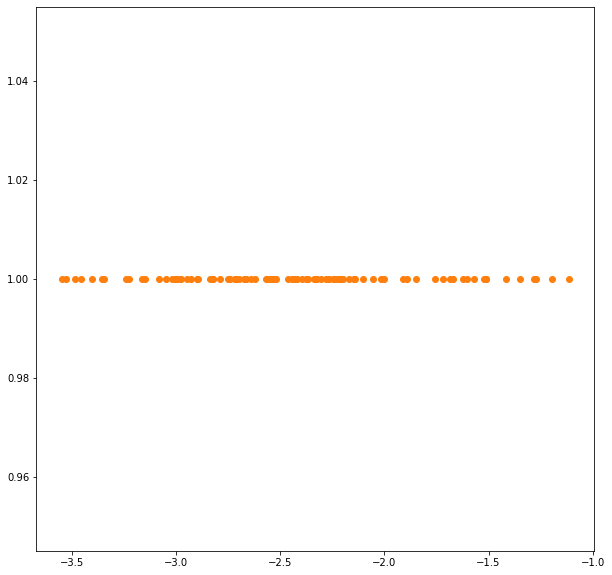

4/4 [==============================] - 0s 3ms/step - loss: 0.5088
MSE : 0.5087502598762512


In [6]:
encoded = encoder.predict(X_test)
plot_1d_points(encoded)
print(f"MSE : {autoencoder_2d.evaluate(X_test, X_test)}")

Building a model of a nonlinear autoencoder for two-dimensional representation

In [7]:
input_val = Input(shape=(None, 500, 3))
encoded = Dense(2, activation='relu')(input_val)
decoded = Dense(3, activation='relu')(encoded)

autoencoder_2d = keras.Model(input_val, decoded)
encoder = keras.Model(input_val, encoded)
autoencoder_2d.compile(optimizer='adam', loss='mean_squared_error')
autoencoder_2d.fit(X_train, X_train, epochs=100, shuffle=True)

Epoch 1/100
13/13 [==============================] - 1s 3ms/step - loss: 6.2269
Epoch 2/100
13/13 [==============================] - 0s 4ms/step - loss: 6.0126
Epoch 3/100
13/13 [==============================] - 0s 4ms/step - loss: 5.8187
Epoch 4/100
13/13 [==============================] - 0s 5ms/step - loss: 5.6409
Epoch 5/100
13/13 [==============================] - 0s 4ms/step - loss: 5.4719
Epoch 6/100
13/13 [==============================] - 0s 4ms/step - loss: 5.3062
Epoch 7/100
13/13 [==============================] - 0s 6ms/step - loss: 5.1140
Epoch 8/100
13/13 [==============================] - 0s 5ms/step - loss: 4.8503
Epoch 9/100
13/13 [==============================] - 0s 4ms/step - loss: 4.4612
Epoch 10/100
13/13 [==============================] - 0s 4ms/step - loss: 3.9666
Epoch 11/100
13/13 [==============================] - 0s 5ms/step - loss: 3.5125
Epoch 12/100
13/13 [==============================] - 0s 5ms/step - loss: 3.1576
Epoch 13/100
13/13 [=================

Displaying a two-dimensional representation graphically

4/4 [==============================] - 0s 4ms/step


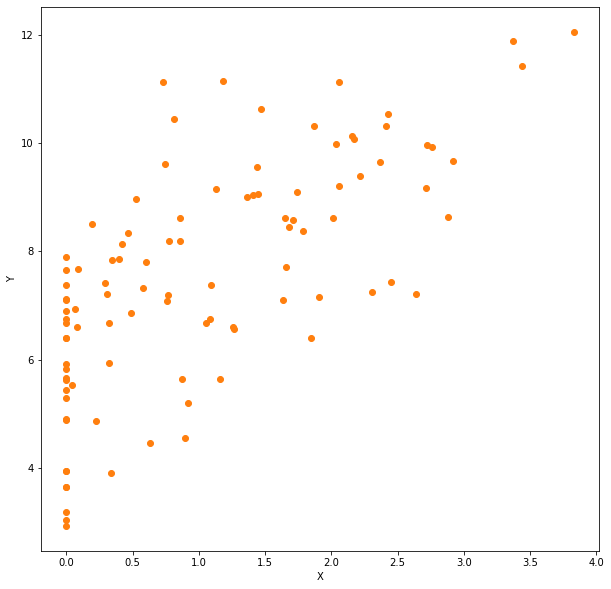

4/4 [==============================] - 0s 4ms/step - loss: 0.7691
MSE : 0.7690677046775818


In [8]:
encoded = encoder.predict(X_test)
plot_2d_points(encoded)
print(f"MSE : {autoencoder_2d.evaluate(X_test, X_test)}")

Building a model of a nonlinear autoencoder for one-dimensional representation

In [9]:
input_val = Input(shape=(None, 500, 3))
encoded = Dense(1, activation='sigmoid')(input_val)
decoded = Dense(3, activation='sigmoid')(encoded)

autoencoder_1d = keras.Model(input_val, decoded)
encoder = keras.Model(input_val, encoded)
autoencoder_1d.compile(optimizer='adam', loss='mean_squared_error')
autoencoder_1d.fit(X, X, epochs=100, shuffle=True, verbose=1)

Epoch 1/100
16/16 [==============================] - 1s 3ms/step - loss: 7.4967
Epoch 2/100
16/16 [==============================] - 0s 5ms/step - loss: 7.4687
Epoch 3/100
16/16 [==============================] - 0s 4ms/step - loss: 7.4403
Epoch 4/100
16/16 [==============================] - 0s 5ms/step - loss: 7.4119
Epoch 5/100
16/16 [==============================] - 0s 4ms/step - loss: 7.3831
Epoch 6/100
16/16 [==============================] - 0s 5ms/step - loss: 7.3532
Epoch 7/100
16/16 [==============================] - 0s 6ms/step - loss: 7.3224
Epoch 8/100
16/16 [==============================] - 0s 6ms/step - loss: 7.2906
Epoch 9/100
16/16 [==============================] - 0s 5ms/step - loss: 7.2576
Epoch 10/100
16/16 [==============================] - 0s 5ms/step - loss: 7.2229
Epoch 11/100
16/16 [==============================] - 0s 6ms/step - loss: 7.1874
Epoch 12/100
16/16 [==============================] - 0s 5ms/step - loss: 7.1510
Epoch 13/100
16/16 [=================

Displaying a two-dimensional representation graphically

4/4 [==============================] - 0s 3ms/step


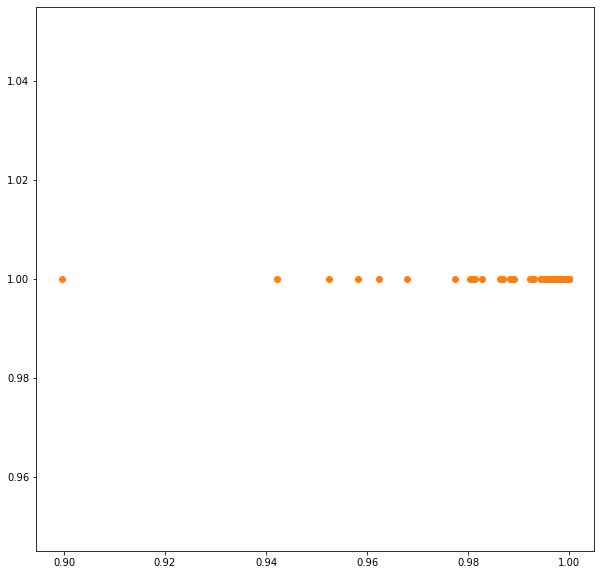

4/4 [==============================] - 0s 3ms/step - loss: 0.7691
MSE : 0.7690677046775818


In [10]:
encoded = encoder.predict(X_test)
plot_1d_points(encoded)
print(f"MSE : {autoencoder_2d.evaluate(X_test, X_test)}")